# Housing Unit Inventory Workflow

Functions to obtain and clean data required for the v0.1.0 Housing Unit Inventory. 
The workflow  replicates the original alpha version 
of Housing Unit Inventory workflow in Python using Census API. 

The workflow also expands the Housing Unit Inventory to include
household income based on family and non-family income distributions 
by race and ethnicity.

For the original Alpha Release of the housing unit inventory 
process and example applications see:

Rosenheim, Nathanael (2021) “Detailed Household and Housing Unit Characteristics: 
Alpha Release of Housing Unit Inventories.” DesignSafe-CI. 
https://doi.org/10.17603/ds2-jwf6-s535.

The 2010 Census Data provides detailed household and housing unit, 
level characteristics at the census block level. 

The 2012 5-year American Community Survey provides detailed 
household level characteristics at the census tract level.

## Description of Program
- program:    ICD_1av1_run_HUI_v010_workflow
- task:       Obtain and clean data for Housing Unit Inventory.
- See github commits for description of program updates
- Current Version:    2022-02-01
- project:    Interdependent Networked Community Resilience Modeling Environment (IN-CORE)'}, Subtask 5.2 - Social Institutions
- funding:	  NIST Financial Assistance Award Numbers: 70NANB15H044 and 70NANB20H008 
- author:     Nathanael Rosenheim

- Suggested Citation:
Rosenheim, N. (2022)

### Setup notebook environment to access Cloned Github Package
This notebook uses packages that are in development. The packages are available at:

https://github.com/npr99/

To replicate this notebook Clone the Github Package to a folder that is a sibling of this notebook.

To access the sibling package you will need to append the parent directory ('..') to the system path list.

In [23]:
import numpy as np
import pandas as pd
import os # For saving output to path
import sys

In [24]:
# to access new package that is in a sibling folder - the system path list needs to include the parent folder (..)'},
# append the path of the directory that includes the github repository.
github_code_path  = "..\\github_com\\npr99\\Population_Inventory"
sys.path.append(github_code_path)

In [25]:
os.getcwd()

'g:\\Shared drives\\HRRC_IN-CORE\\Tasks\\M5.2-01 Pop inventory\\WorkNPR'

In [26]:
# To reload submodules need to use this magic command to set autoreload on
%load_ext autoreload
%autoreload 2
# open, read, and execute python program with reusable commands
from pyincore_data_addons.ICD00b_directory_design import directory_design
from pyincore_data_addons.ICD06c_Codebook import *
from pyincore_data_addons.ICD06b_Figures import *

from pyincore_data_addons.SourceData.api_census_gov.acg_00e_incore_huiv010 \
    import incore_v010_DataStructure

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
version = '0.1.0'
version_text = 'v0-1-0'

# Save Outputfolder - due to long folder name paths output saved to folder with shorter name
# files from this program will be saved with the program name - 
# this helps to follow the overall workflow
outputfolder = "ICD_workflow_2022-02-01"
# Make directory to save output
if not os.path.exists(outputfolder):
    os.mkdir(outputfolder)

communities = {'Lumberton_NC' : {
                    'community_name' : 'Lumberton, NC',
                    'counties' : { 
                        1 : {'FIPS Code' : '37155', 'Name' : 'Robeson County, NC'}}},                   
                }
communities = {'Shelby_TN' : {
                    'community_name' : 'Memphis, TN',
                    'counties' : { 
                        1 : {'FIPS Code' : '47157', 'Name' : 'Shelby County, TN'}}},                   
                }
communities = {'Lumberton_NC' : {
                    'community_name' : 'Lumberton, NC',
                    'counties' : { 
                        1 : {'FIPS Code' : '37155', 'Name' : 'Robeson County, NC'}}},                   
                }
# Set random seed for reproducibility
seed = 9876
basevintage = 2010


In [28]:
for community in communities.keys():
    print("Setting up Housing Unit Inventory for",communities[community]['community_name'])
    for county in communities[community]['counties'].keys():
        state_county = communities[community]['counties'][county]['FIPS Code']
        state_county_name  = communities[community]['counties'][county]['Name']
        print(state_county_name,': county FIPS Code',state_county)
    
        outputfolders = directory_design(state_county_name = state_county_name,
                                            outputfolder = outputfolder)
                                            

    #Save results for community name
    output_filename = f'hui_v0-1-0_{community}_{basevintage}_rs{seed}'
    csv_filepath = outputfolders['top']+"/"+output_filename+'.csv'
    savefile = sys.path[0]+"/"+csv_filepath
    hui_incore_df = pd.read_csv(savefile)

    incore_columns = incore_v010_DataStructure
    # Loop through columns to set type
    for incore_col in incore_columns.keys():    
        # Set variable type
        var_type = incore_columns[incore_col]['pyType']
        print('Checking',incore_col,'Data Type')
        current_type = type(hui_incore_df[incore_col])
        print('   Current type:',current_type,'Expected type',var_type)
        hui_incore_df[incore_col] = hui_incore_df[incore_col].astype(var_type)

Setting up Housing Unit Inventory for Lumberton, NC
Robeson County, NC : county FIPS Code 37155
Checking huid Data Type
   Current type: <class 'pandas.core.series.Series'> Expected type <class 'str'>
Checking blockid Data Type
   Current type: <class 'pandas.core.series.Series'> Expected type <class 'str'>
Checking tractid Data Type
   Current type: <class 'pandas.core.series.Series'> Expected type <class 'str'>
Checking bgid Data Type
   Current type: <class 'pandas.core.series.Series'> Expected type <class 'str'>
Checking FIPScounty Data Type
   Current type: <class 'pandas.core.series.Series'> Expected type <class 'str'>
Checking numprec Data Type
   Current type: <class 'pandas.core.series.Series'> Expected type <class 'int'>
Checking ownershp Data Type
   Current type: <class 'pandas.core.series.Series'> Expected type category
Checking race Data Type
   Current type: <class 'pandas.core.series.Series'> Expected type category
Checking hispan Data Type
   Current type: <class 'pand

In [29]:
hui_incore_df.head()

,huid,blockid,tractid,bgid,FIPScounty,numprec,ownershp,race,hispan,vacancy,gqtype,incomegroup,randincome,hhinc
0,B371559601011003H001,371559601011003,37155960101,371559601011,37155,1,1.0,1.0,0.0,0.0,0.0,1.0,5947.0,1.0
1,B371559601011005H001,371559601011005,37155960101,371559601011,37155,1,1.0,1.0,0.0,0.0,0.0,1.0,550.0,1.0
2,B371559601011006H001,371559601011006,37155960101,371559601011,37155,1,1.0,1.0,0.0,0.0,0.0,1.0,6115.0,1.0
3,B371559601011006H002,371559601011006,37155960101,371559601011,37155,1,1.0,1.0,0.0,0.0,0.0,5.0,26415.0,3.0
4,B371559601011007H006,371559601011007,37155960101,371559601011,37155,1,2.0,1.0,0.0,0.0,0.0,5.0,28058.0,3.0


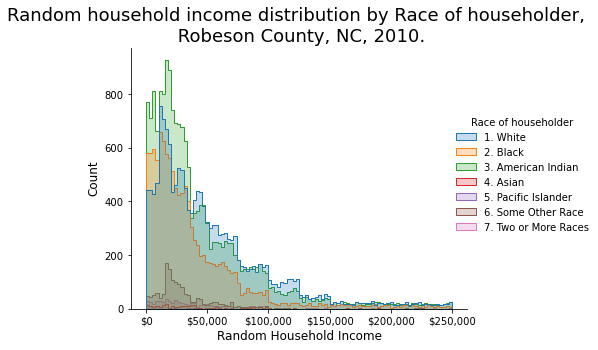

In [30]:
from pyincore_data_addons.ICD06b_Figures import income_distribution
# Explore data
for by_var in ["race"]:
    income_by_race = income_distribution(input_df = hui_incore_df,
                    variable = "randincome",
                    by_variable = by_var,
                    datastructure = incore_v010_DataStructure,
                    communities= communities,
                    community = community,
                    year = basevintage,
                    outputfolders = outputfolders)

In [31]:
sourcedata_filepath = "pyincore_data_addons\\SourceData\\api_census_gov"
keyterms_filepath = github_code_path+'\\'+sourcedata_filepath+ \
        '\\'+"acg_00a_keyterms.md"

projectoverview_filepath = github_code_path+'\\pyincore_data_addons\\'+ \
        "ICD00a_projectoverview.md"


In [32]:
# Create PDF Codebook
pdfcodebook = codebook(input_df = hui_incore_df,
        datastructure = incore_v010_DataStructure,
        projectoverview = projectoverview_filepath,
        keyterms = keyterms_filepath,
        communities = communities,
        community = community,
        year = basevintage,
        output_filename = output_filename,
        outputfolders = outputfolders,
        image_path = 'IN-CORE_HRRC_CodebookBanner.png')

In [34]:
pdfcodebook.create_codebook()

Housing Unit Inventory Codebook for Robeson County, NC, 2010

huid
huid: Housing Unit ID
blockid
blockid: Block ID
tractid
tractid: 2010 Census Tract ID
bgid
bgid: 2010 Census Block Group ID
FIPScounty
FIPScounty: County FIPS Code
numprec
numprec: Number of person records
ownershp
ownershp: Tenure Status
6
ownershp: Tenure Status - Categorical codes, labels and frequencies
race
race: Race of householder
6
race: Race of householder - Categorical codes, labels and frequencies
hispan
hispan: Hispanic Householder
6
hispan: Hispanic Householder - Categorical codes, labels and frequencies
vacancy
vacancy: Vacancy Type
6
vacancy: Vacancy Type - Categorical codes, labels and frequencies
gqtype
gqtype: Group Quarters Type
6
gqtype: Group Quarters Type - Categorical codes, labels and frequencies
incomegroup
incomegroup: Detailed Household Income Group
6
incomegroup: Detailed Household Income Group - Categorical codes, labels and frequencies
randincome
randincome: Random household income
hhinc
hh

INFO - fpdf.py:_substitute_page_number() - Substitution of '{nb}' was performed in the document


Saving codebook to ICD_workflow_2022-02-01/RobesonCounty_NC/hui_v0-1-0_Lumberton_NC_2010_rs9876.pdf
